In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
def cal_eff_purity_ownMC(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dp_isSignal','Dp_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0

    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = N_rec / len(concatenated_df) 

    eff = N_rec/N_gen
    
    recon_df = get_pd(file_name, tree, base_filter, variables)
    N_true = len(recon_df.query('Dp_isSignal==1'))
    purity = N_true/N_rec
    signal_eff = eff * purity
    
    signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)
    
    print(f"signal_eff={signal_eff:.4f}, signal_eff_error={signal_eff_error: .4f} ,eff={eff:.4f}, purity={purity:.4f}, multiplicity={multiplicity:.4f}, ")
    
    return (signal_eff, eff, purity, multiplicity)

# D+ -> (eta -> gg) pi+

## pre_cut

In [3]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.4533, signal_eff_error= 0.0005 ,eff=2.1070, purity=0.2152, multiplicity=3.2904, 
D+ -> (eta -> gg) pi+ eff:0.453324


input_line_83:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_94:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_105:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [4]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg_cc/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.4513, signal_eff_error= 0.0005 ,eff=2.1183, purity=0.2130, multiplicity=3.3071, 
D+ -> (eta -> gg) pi+ eff:0.451274


## tight_v0

In [95]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_sel_treefit_240317_tight_v0_looseeta_BCS/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))



20
signal_eff=0.1173, signal_eff_error= 0.0003 ,eff=0.1424, purity=0.8238, multiplicity=1.0934, 
D+ -> (eta -> gg) pi+ eff:0.11728800000000002


## tight_v1


In [20]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))



20
signal_eff=0.1175, signal_eff_error= 0.0003 ,eff=0.1402, purity=0.8378, multiplicity=1.0828, 
D+ -> (eta -> gg) pi+ eff:0.117473


140209


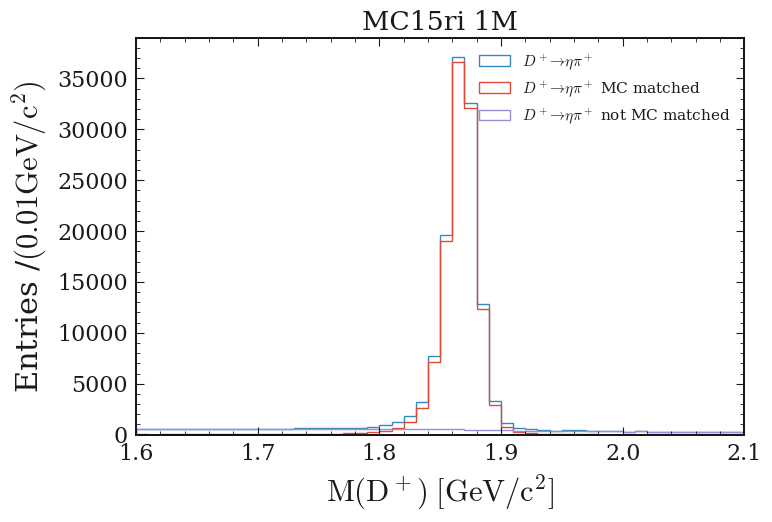

In [21]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM.png"
plt.savefig(file1_name)
print(len(df))

140209


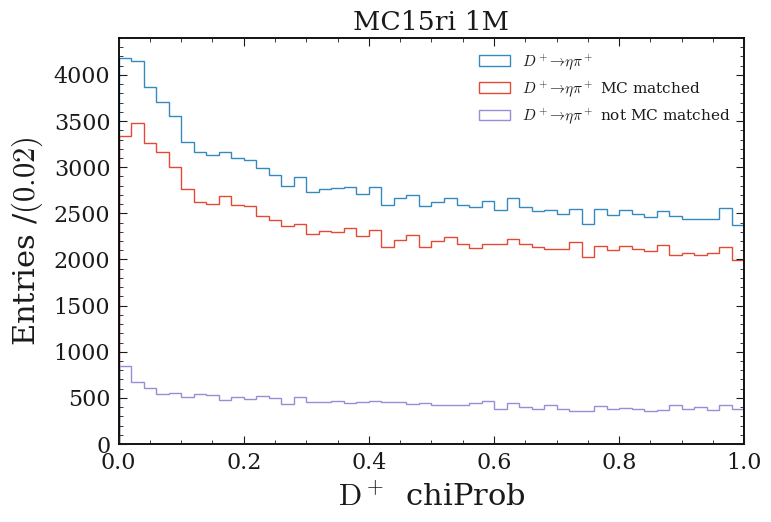

In [22]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_chiProb.png"
plt.savefig(file1_name)
print(len(df))

In [23]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_gg_rank==1"

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.1131, signal_eff_error= 0.0003 ,eff=0.1295, purity=0.8732, multiplicity=1.0000, 
D+ -> (eta -> gg) pi+ eff:0.11305899999999999


129484


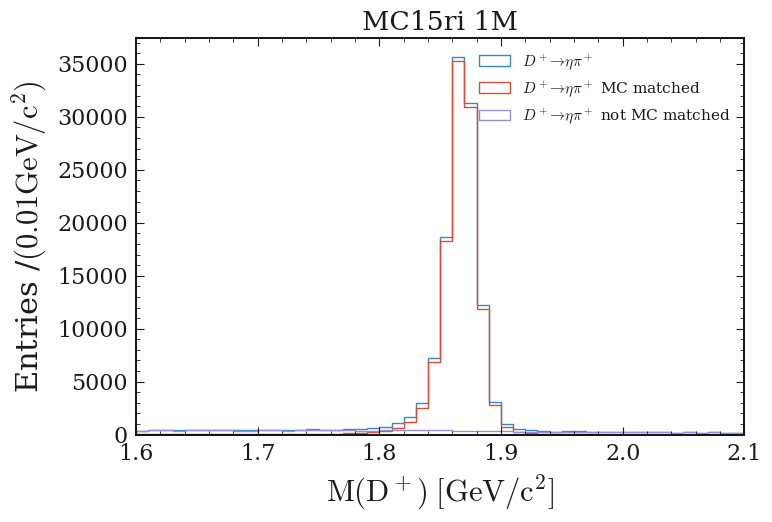

In [24]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM_BCS.png"
plt.savefig(file1_name)
print(len(df))

129484


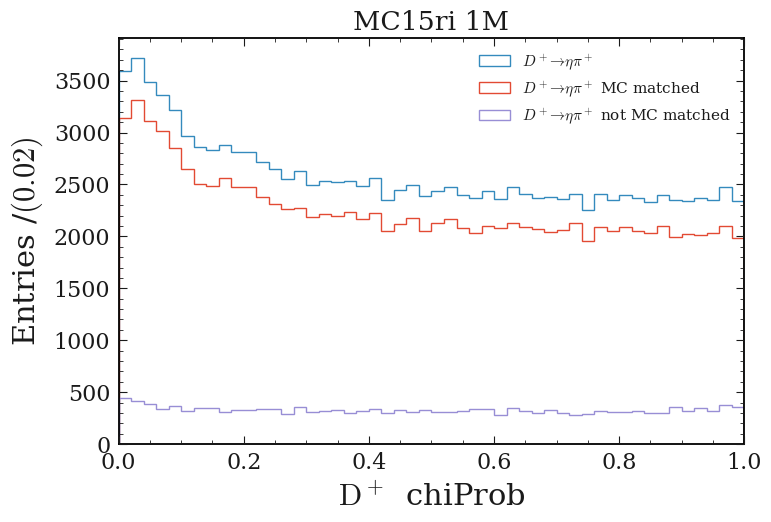

In [25]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_chiProb_BCS.png"
plt.savefig(file1_name)
print(len(df))

In [102]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_sel_treefit_240317_tight_v0_BCS_etaconst/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))



20
signal_eff=0.1183, signal_eff_error= 0.0003 ,eff=0.1440, purity=0.8215, multiplicity=1.0947, 
D+ -> (eta -> gg) pi+ eff:0.118326


144033


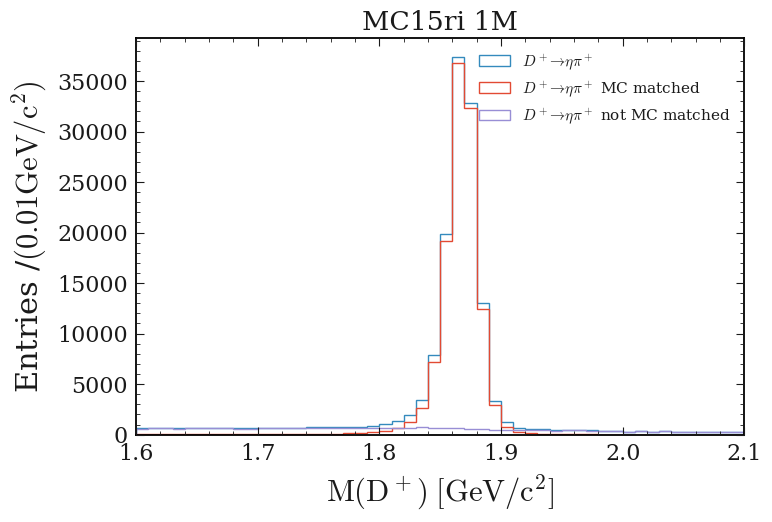

In [103]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_DpM.png"
plt.savefig(file1_name)
print(len(df))

144033


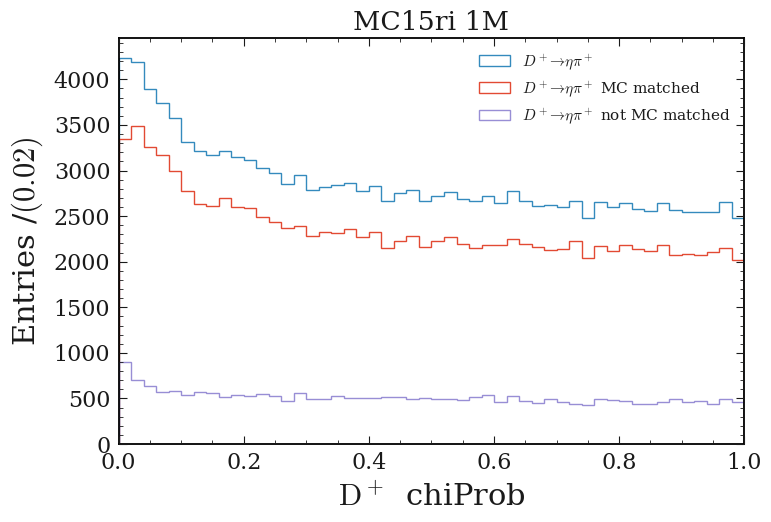

In [104]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_chiProb.png"
plt.savefig(file1_name)
print(len(df))

In [105]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_sel_treefit_240317_tight_v0_BCS_etaconst/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter='etapip_gg_rank==1'

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))



20
signal_eff=0.1132, signal_eff_error= 0.0003 ,eff=0.1316, purity=0.8600, multiplicity=1.0000, 
D+ -> (eta -> gg) pi+ eff:0.113155


131576


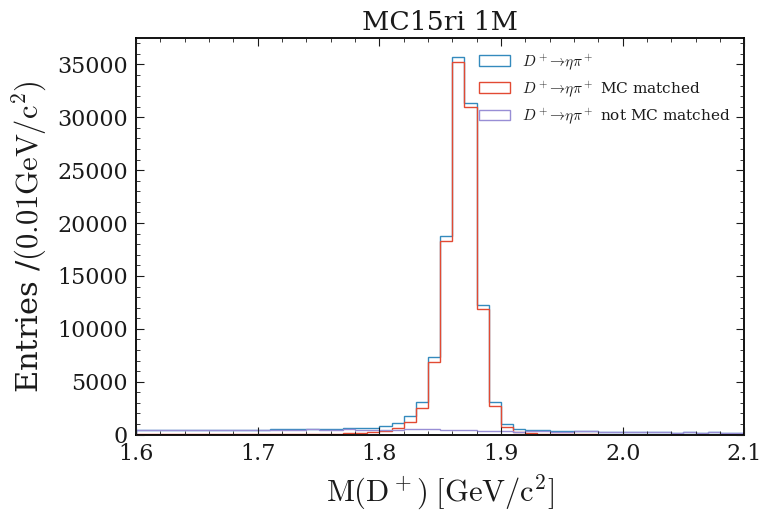

In [106]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_DpM_BCS.png"
plt.savefig(file1_name)
print(len(df))

131576


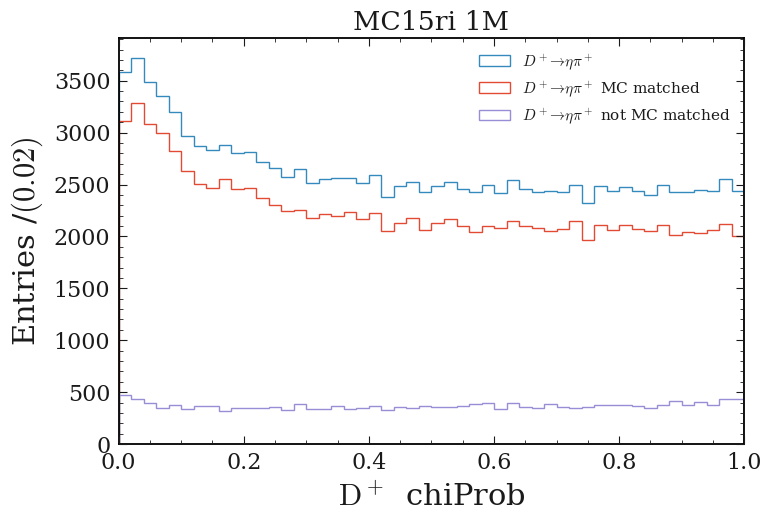

In [107]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_chiProb_BCS.png"
plt.savefig(file1_name)
print(len(df))

# D+ -> (eta -> pi+ pi- pi0) pi+

In [58]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

0


ZeroDivisionError: division by zero

In [6]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi_cc/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.2792, signal_eff_error= 0.0004 ,eff=4.7062, purity=0.0593, multiplicity=8.0740, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.279191


In [147]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_sel_treefit_240317_tight_v0_looseeta_BCS/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'
# base_filter = 'abs(Dp_M-1.8697)<' + '4 * ' + str(std_dev_Dp_M_true) 
# base_filter = '(Dp_M-1.8697)<' + '4 * ' + str(std_dev_Dp_M_true) 
# base_filter += ' && ' + '(Dp_M-1.8697)>' + '- 4.5 * ' + str(std_dev_Dp_M_true) 

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.0738, signal_eff_error= 0.0003 ,eff=0.1128, purity=0.6545, multiplicity=1.2454, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.07385


In [5]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'
# base_filter = 'abs(Dp_M-1.8697)<' + '4 * ' + str(std_dev_Dp_M_true) 
# base_filter = '(Dp_M-1.8697)<' + '4 * ' + str(std_dev_Dp_M_true) 
# base_filter += ' && ' + '(Dp_M-1.8697)>' + '- 4.5 * ' + str(std_dev_Dp_M_true) 

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.0717, signal_eff_error= 0.0003 ,eff=0.0938, purity=0.7647, multiplicity=1.1370, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.07173


93801


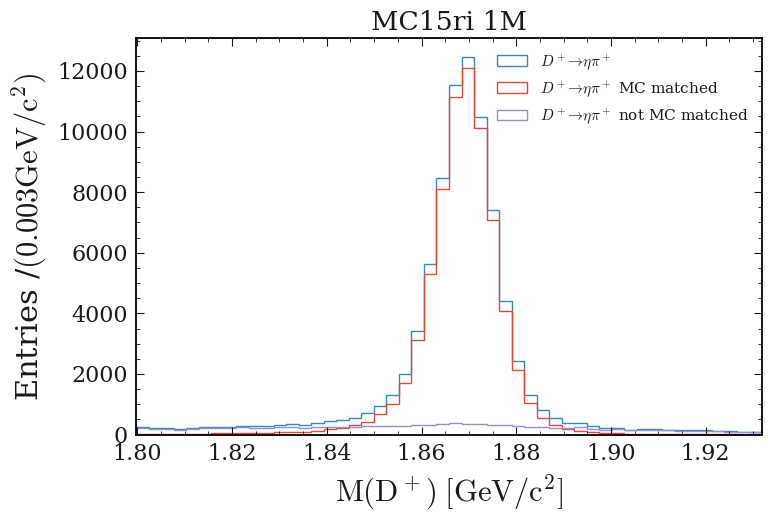

In [8]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)
xrange = (1.8697-4.5*std_dev_Dp_M_true,1.8697+4*std_dev_Dp_M_true,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_DpM.png"
# plt.savefig(file1_name)
print(len(df))

In [7]:
std_dev_Dp_M_true = df2['Dp_M'].std()

print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)
print(1.8697 + 4*std_dev_Dp_M_true)
print(1.8697 - 4*std_dev_Dp_M_true)

Standard deviation of column 'Dp_M': 0.015556157530058977
1.9319246301202357
1.807475369879764


93801


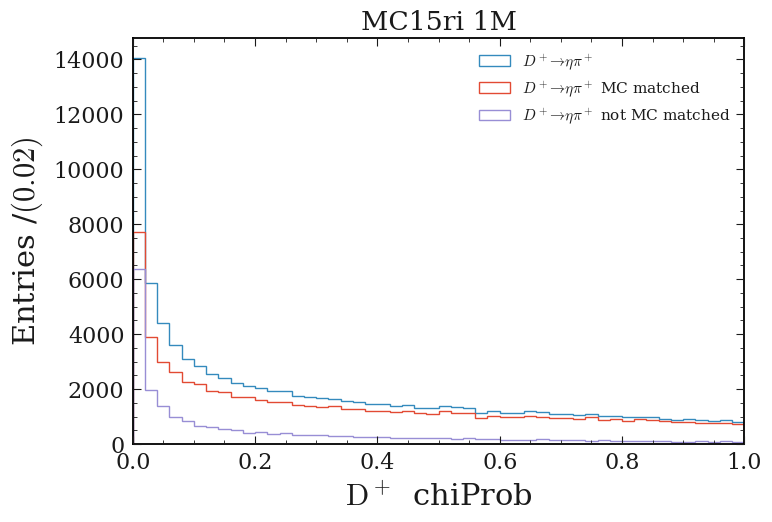

In [9]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_chiProb.png"
# plt.savefig(file1_name)
print(len(df))

In [10]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_pipipi_rank==1"

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.0694, signal_eff_error= 0.0003 ,eff=0.0825, purity=0.8413, multiplicity=1.0000, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.06940600000000001


82500


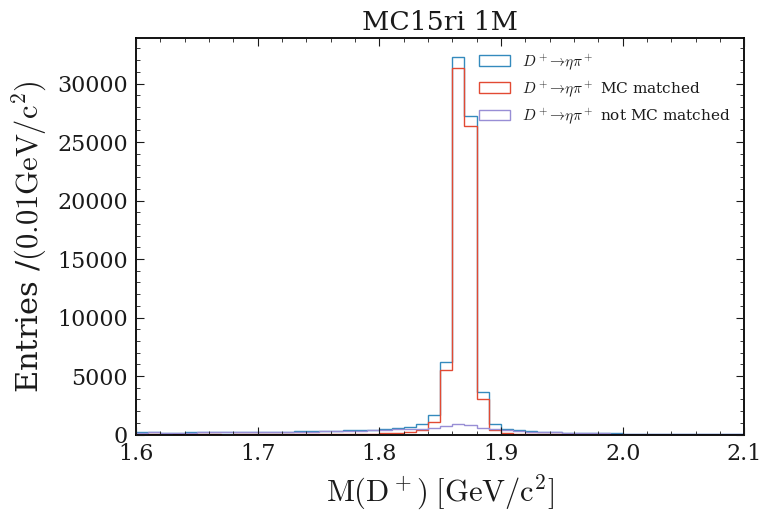

In [11]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_DpM_BCS.png"
# plt.savefig(file1_name)
print(len(df))

90600


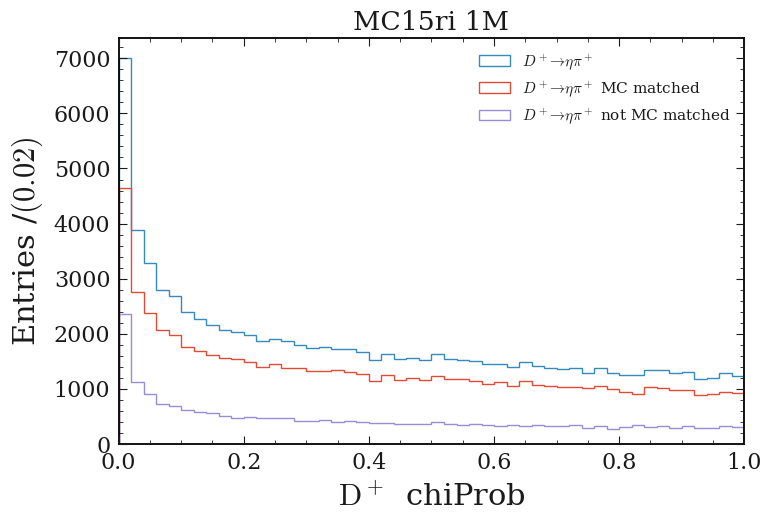

In [113]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_chiProb_BCS.png"
plt.savefig(file1_name)
print(len(df))

In [119]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_sel_treefit_240317_tight_v0_BCS_etaconst/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' Dp_M>0'

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.0735, signal_eff_error= 0.0003 ,eff=0.1108, purity=0.6638, multiplicity=1.2344, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.07353


110775


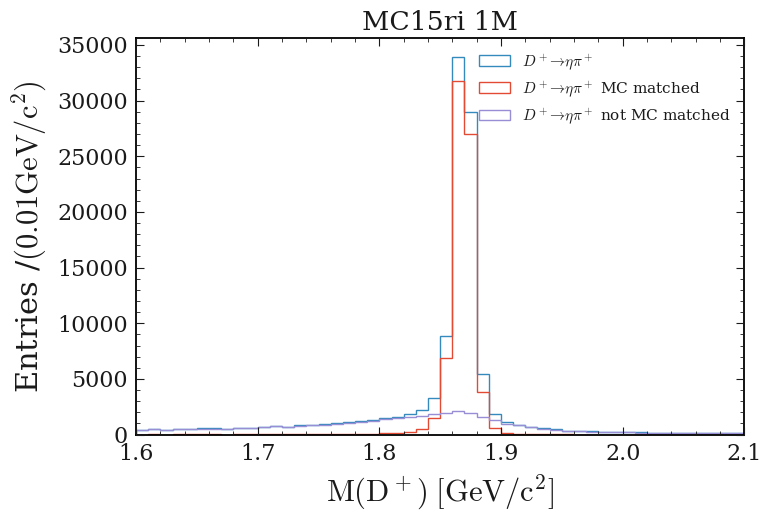

In [120]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_DpM.png"
plt.savefig(file1_name)
print(len(df))

110775


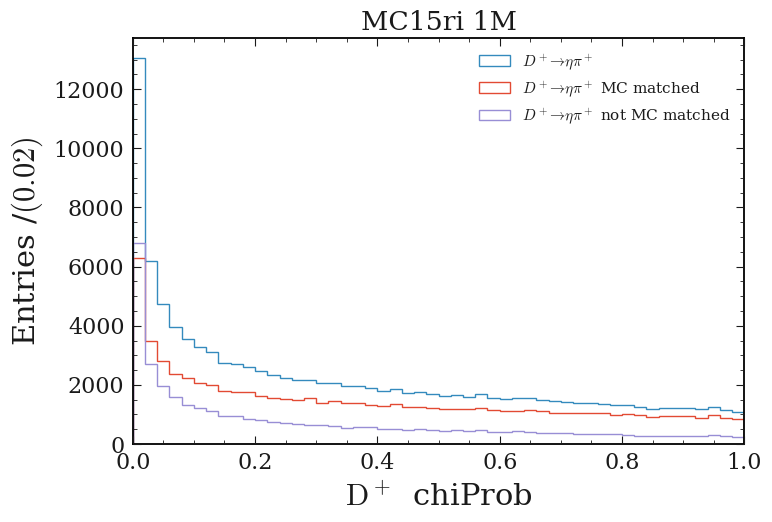

In [121]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_chiProb.png"
plt.savefig(file1_name)
print(len(df))

In [122]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_sel_treefit_240317_tight_v0_BCS_etaconst/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' D0_M>0'
base_filter=' etapip_pipipi_rank==1'

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

20
signal_eff=0.0686, signal_eff_error= 0.0003 ,eff=0.0897, purity=0.7641, multiplicity=1.0000, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.068574


89742


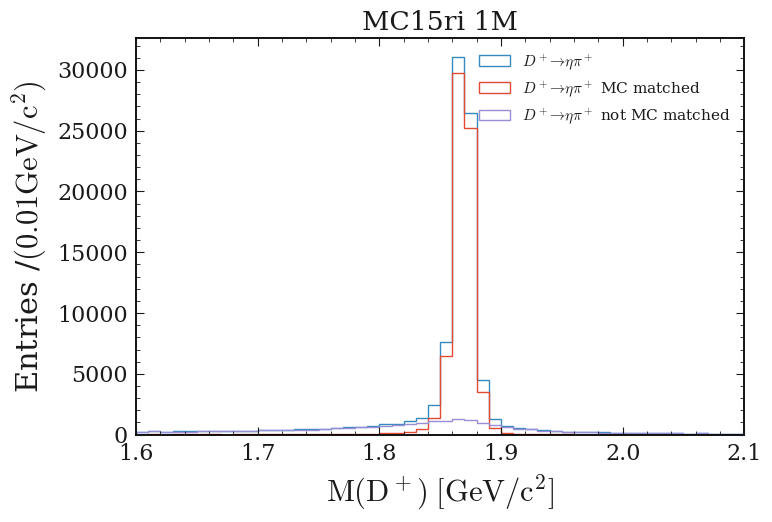

In [123]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_DpM_BCS.png"
plt.savefig(file1_name)
print(len(df))

89742


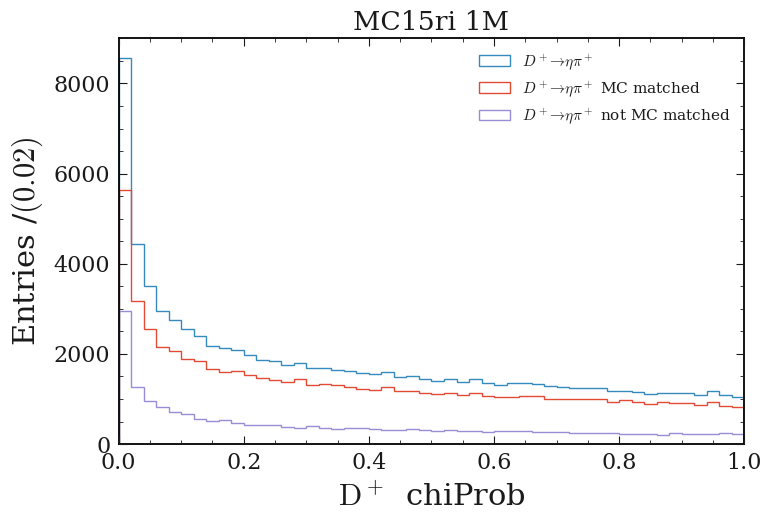

In [124]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_chiProb_BCS.png"
plt.savefig(file1_name)
print(len(df))